In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [11]:
def initial_conditions( x, x_L, rho_L ):
    
    rho0 = numpy.zeros( len( x ) )
    idx = numpy.where( x == x_L )[0]
    idx = idx[ 0 ]
    rho0[ 0:idx ] = rho_L * x[ 0:idx ] / x_L
    
    return rho0

def velocity( rho, u_max, rho_max ):
    
    u = u_max * ( 1 - rho / rho_max )
    
    return u

def flux( rho, u_max, rho_max ):
    
    F = rho * velocity( rho, u_max, rho_max )
    
    return F

def ftbs( rho0, dt, dx, nt, nx, u_max, rho_max ):
    
    rho = rho0.copy()
    rho_hist = [ rho0.copy() ]
    
    for n in range( nt ):
        
        rho_n = rho.copy() 
    
        for i in range( 1, nx ):

            rho[ i ] = -( flux( rho_n[ i ], u_max, rho_max ) - flux( rho_n[ i - 1 ], u_max, rho_max ) ) / dx * dt + rho_n[ i ]
    
        rho_hist.append( rho.copy() )
    
#     for n in range( nt ):
        
#         F = flux( rho, u_max, rho_max )
#         rho[ 1: ] = rho[ 1: ] - ( F[ 1: ] - F[ :-1 ] ) * dt / dx
#         rho_hist.append( rho.copy() )
        
    return rho_hist

In [26]:
L = 4
x_L = 2
rho_max = 10
u_max = 1
rho_L = 2

nt = 30
nx = 81
x = numpy.linspace( 0, L, nx )
dx = L / ( nx - 1 )
sigma = 1
dt = sigma * dx / u_max

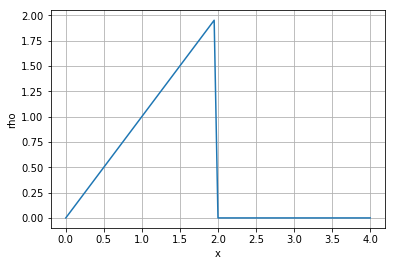

In [27]:
rho0 = initial_conditions( x, x_L, rho_L )
pyplot.plot( x, rho0 )
pyplot.xlabel( 'x' );
pyplot.ylabel( 'rho' );
pyplot.grid()

In [28]:
rho_hist = ftbs( rho0, dt, dx, nt, nx, u_max, rho_max )


In [29]:
def plot_solution( n, rho_hist, x ):
    
    pyplot.figure()
    pyplot.xlabel( 'x' )
    pyplot.ylabel( 'rho' )
    pyplot.grid()
    pyplot.plot( x, rho_hist[ 0 ], label = 'Intitial' )
    pyplot.plot( x, rho_hist[ n ], label = 'Current' )
    pyplot.legend()
    pyplot.show()

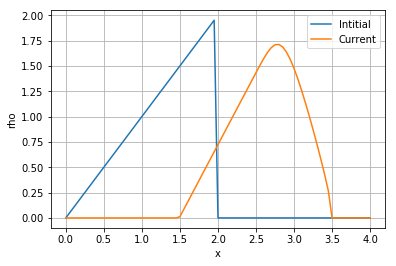

In [30]:
plot_solution( nt, rho_hist, x)

In [31]:
import ipywidgets

In [32]:
nt_slider = ipywidgets.IntSlider( value = 0, min = 0, max = nt, step = 1, description = 'Time Step' )
w = ipywidgets.interactive( plot_solution, n = nt_slider, rho_hist = ipywidgets.fixed( rho_hist ), x = ipywidgets.fixed( x ) )

In [33]:
display( w )

interactive(children=(IntSlider(value=0, description='Time Step', max=30), Output()), _dom_classes=('widget-in…